In [5]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest, RandomForestRegressor
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')
!pip install --upgrade jupyter ipywidgets


In [2]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [6]:
df = pd.read_csv("GlobalWeatherRepository.csv") 
print("Dataset Loaded Successfully!")
print("\nBelow here we have Datasets Information\n")
print(df.info())
df.head()
df.describe()

Dataset Loaded Successfully!

Below here we have Datasets Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62363 entries, 0 to 62362
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       62363 non-null  object 
 1   location_name                 62363 non-null  object 
 2   latitude                      62363 non-null  float64
 3   longitude                     62363 non-null  float64
 4   timezone                      62363 non-null  object 
 5   last_updated_epoch            62363 non-null  int64  
 6   last_updated                  62363 non-null  object 
 7   temperature_celsius           62363 non-null  float64
 8   temperature_fahrenheit        62363 non-null  float64
 9   condition_text                62363 non-null  object 
 10  wind_mph                      62363 non-null  float64
 11  wind_kph                      62363 non-null  fl

,latitude,longitude,last_updated_epoch,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
count,62363.000000,62363.000000,6.236300e+04,62363.000000,62363.000000,62363.000000,62363.000000,62363.000000,62363.000000,62363.000000,...,62363.000000,62363.000000,62363.000000,62363.000000,62363.000000,62363.000000,62363.000000,62363.000000,62363.000000,62363.000000
mean,19.135189,22.180023,1.729746e+09,22.116372,71.811064,8.288908,13.343600,168.837468,1014.155541,29.947399,...,19.078428,528.676275,63.634256,15.210747,11.442181,25.686801,51.898200,1.735869,2.728926,48.981239
std,24.475089,65.818563,8.051186e+06,9.602284,17.283909,9.113311,14.664599,103.726299,13.347983,0.394146,...,16.533252,930.067976,35.923511,26.371990,47.976399,44.260055,159.841783,0.993914,2.603333,35.103497
min,-41.300000,-175.200000,1.715849e+09,-24.900000,-12.800000,2.200000,3.600000,1.000000,947.000000,27.960000,...,3.600000,-9999.000000,0.000000,0.000000,-9999.000000,0.185000,-1848.150000,1.000000,1.000000,0.000000
25%,3.750000,-6.836100,1.722861e+09,16.600000,61.800000,4.000000,6.500000,80.000000,1010.000000,29.830000,...,10.800000,227.000000,39.300000,0.925000,0.740000,5.800000,9.065000,1.000000,1.000000,14.000000
50%,17.250000,23.316700,1.729761e+09,25.000000,76.900000,6.900000,11.200000,160.000000,1013.000000,29.920000,...,16.600000,329.184000,61.000000,3.515000,2.400000,13.875000,21.090000,1.000000,2.000000,49.000000
75%,40.400000,50.580000,1.736721e+09,28.400000,83.100000,11.400000,18.400000,256.000000,1018.000000,30.050000,...,25.300000,510.600000,83.000000,16.725000,9.065000,30.155000,46.250000,2.000000,3.000000,83.000000
max,64.150000,179.220000,1.743584e+09,49.200000,120.600000,1841.200000,2963.200000,360.000000,3006.000000,88.770000,...,2970.400000,38879.398000,480.700000,427.700000,521.330000,1614.100000,6037.290000,6.000000,10.000000,100.000000


In [4]:
#Cleaning the data
missing_values=df.isnull().sum()
print("Missing values:\n")
print(missing_values)
missing_values = df.isnull().sum().sum()

if missing_values > 0:
    print(f"Total missing values: {missing_values}")
    df = df.dropna()
    print("Missing values is deleted")
else:
    print(f"\nNo missing values in the Dataset.")

Missing values:

country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone              

In [5]:
#Removing if there is any duplicates
df.drop_duplicates(inplace=True)

In [6]:

# Handling outliers using Isolation Forest
iso = IsolationForest(contamination=0.01)
outliers = iso.fit_predict(df.select_dtypes(include=[np.number]))
df['outlier'] = outliers


In [ ]:
# Here we visualize outliers for temperature
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='last_updated', y='temperature_celsius', hue='outlier', palette={1:'blue', -1:'red'})
plt.title('Temperature Outlier Detection')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

In [ ]:
# Filter rows where all columns have Z-scores below the threshold (removing outliers)

from scipy.stats import zscore

numerical_cols = df.select_dtypes(include=[np.number]).columns

z_scores = df[numerical_cols].apply(zscore)

threshold = 3

df = df[(z_scores < threshold).all(axis=1)]

print("\n✅ Outlier Filtering Completed! Outliers removed successfully.")


In [ ]:
# Applying Z-score normalization to all numerical columns to scale the values

numerical_cols = df.select_dtypes(include=[np.number]).columns

# Apply Z-score normalization
df[numerical_cols] = df[numerical_cols].apply(zscore)

print("\n✅ Normalization Completed! All numerical values are now scaled.")


Performing Advanced EDA (finding trends, creating visualizations).

In [ ]:
# Ploting a histogram with KDE to visualize the distribution of temperature values

plt.figure(figsize=(8,5))
sns.histplot(df['temperature_celsius'], bins=30, kde=True, color='green')
plt.title("Distribution of Temperature Values")
plt.xlabel("Temperature (°C)")
plt.show()


In [ ]:
# Creating a scatter plot to visualize the relationship between wind speed and temperature, with humidity represented by color

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='wind_kph', y='temperature_celsius', hue='humidity', palette='coolwarm')
plt.title("Wind Speed vs. Temperature")
plt.xlabel("Wind Speed (kph)")
plt.ylabel("Temperature (°C)")
plt.show()


Advancced EDA Completed!

Creating a simple model and evaluated

In [ ]:
pip install statsmodels


In [7]:
#We need to check if the temperature data is stationary.
from statsmodels.tsa.stattools import adfuller

# Check stationarity of the 'temperature_celsius' column
result = adfuller(df['temperature_celsius'].dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")


ADF Statistic: -7.281065336454266
p-value: 1.4999682515391202e-10


In [9]:
# Step 2: Make the Data Stationary (Differencing)
# If the data is non-stationary, we can apply differencing:
df['temperature_diff'] = df['temperature_celsius'].diff().dropna()


In [11]:
# Step 3: Split the Data into Training and Test Sets
# Split the data (80% for training, 20% for testing)
train_size = int(len(df) * 0.8)
train, test = df['temperature_celsius'][:train_size], df['temperature_celsius'][train_size:]


In [12]:
from statsmodels.tsa.arima.model import ARIMA

# Building the ARIMA model (p=1, d=1, q=1) - these values can be tuned
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()

# Makeing predictions
predictions = model_fit.forecast(steps=len(test))


In [13]:
#Evaluating th emodel using Mean Absolute Error(MAE) or Mean Squared Error(MSE)
from sklearn.metrics import mean_absolute_error

# Evaluate the forecast
mae = mean_absolute_error(test, predictions)
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 8.893566932402436


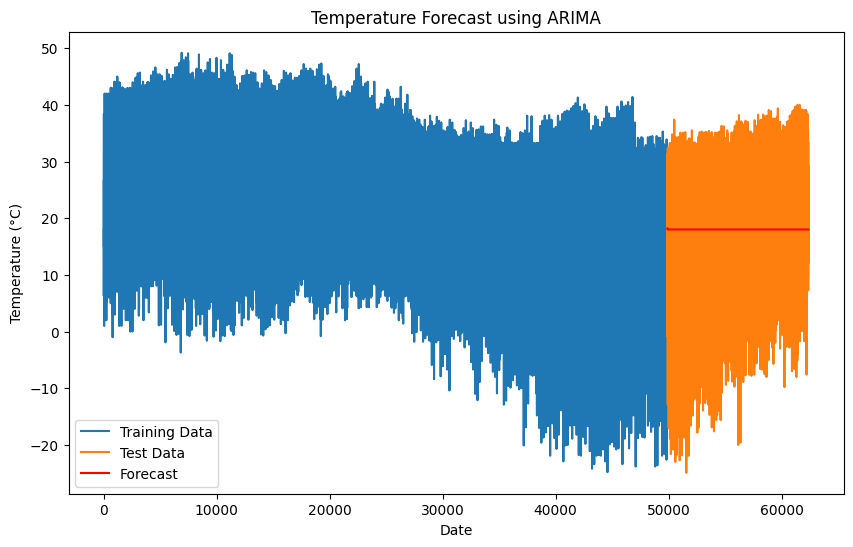

In [14]:
#Visualize the training data, test data, and forecasted values.
plt.figure(figsize=(10, 6))
plt.plot(train, label="Training Data")
plt.plot(test, label="Test Data")
plt.plot(test.index, predictions, label="Forecast", color='red')
plt.title("Temperature Forecast using ARIMA")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()


In [15]:
!git init


Reinitialized existing Git repository in C:/Users/jurge/PycharmProjects/Global Wearther Forecasting/.git/
